In [2]:
from CosinorPy import file_parser, cosinor, cosinor1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import matplotlib.patches as mpl_patches

In [3]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['svg.fonttype'] = 'none'
sns.set(style='whitegrid')

In [5]:
metadata = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/new_filtering2/metadata_all_col.csv', low_memory = False, index_col = "sample_id")
phylum = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/new_filtering2/phylum.csv', index_col = 'Unnamed: 0', low_memory = False)
family = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/new_filtering2/family.csv', index_col = 'Unnamed: 0', low_memory = False)
asv = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/new_filtering2/asv.csv', index_col = 'Unnamed: 0', low_memory = False)
counts = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/new_filtering2/counts.csv', index_col = 'Unnamed: 0', low_memory = False)

## Sample Distributions

In [8]:
mycounts = metadata.groupby(by='col_bin').agg('count').astype(int).reset_index()
mycounts2 = metadata.groupby(by='month').agg('count').astype(int).reset_index()

[Text(0, 0, '0-2am'),
 Text(0, 0, '2-4am'),
 Text(0, 0, '4-6am'),
 Text(0, 0, '6-8am'),
 Text(0, 0, '8-10am'),
 Text(0, 0, '10-noon'),
 Text(0, 0, '12-2pm'),
 Text(0, 0, '2-4pm'),
 Text(0, 0, '4-6pm'),
 Text(0, 0, '6-8pm'),
 Text(0, 0, '8-10pm'),
 Text(0, 0, '10-MN')]

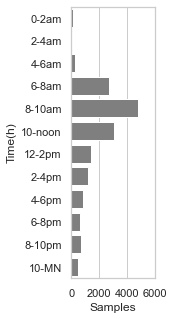

In [12]:
fig, ax = plt.subplots(figsize = (1.5,5))
ax  = sns.barplot(x = mycounts['index'], y = mycounts.col_bin.astype(str), color = sns.color_palette("tab10")[7])
plt.ylabel('Time(h)')
plt.xlabel('Samples')
plt.tick_params(left=False, bottom=False)
#plt.tight_layout()
xticks = [0,2000,4000,6000]
ax.set_xticks(xticks)
ax.set_yticklabels(['0-2am','2-4am','4-6am', '6-8am','8-10am','10-noon','12-2pm','2-4pm','4-6pm','6-8pm','8-10pm','10-MN'])
#plt.savefig('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/new_filtering2/figures/fig1bp1.csv', format = 'svg')

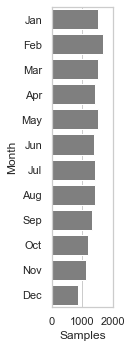

In [13]:
fig, ax = plt.subplots(figsize = (2,5))
ax = sns.barplot(x = mycounts2['index'], y = mycounts2.month.astype(str),color = sns.color_palette("tab10")[7])
plt.ylabel('Month')
plt.xlabel('Samples')
plt.tick_params(left=False, bottom=False)
ax.set_yticklabels(['Jan','Feb','Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
xticks2 = [0,1000,2000]
ax.set_xticks(xticks2)
plt.tight_layout()
#plt.savefig('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/new_filtering2/figures/fig1bp1.csv', format = 'svg')

## Heatmap of Rhythmic ASVs

In [20]:
#Selecting rhythmic asvs
results = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/new_filtering2/results/asv.csv', index_col = 'test')
results = results[results.q<0.05]

In [22]:
#filtering and sorting clr table
filt_asv = asv.T[asv.columns.isin(results.index)]
filt_asv = filt_asv.join(results['acrophase[h]']).sort_values(by=['acrophase[h]']).drop(columns = 'acrophase[h]')

In [ ]:
#create a 4hr bin column
metadata.time = metadata.time.astype(str)
metadata['col_bin_2'] = metadata['time'].replace(['0.0','1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0','11.0','12.0','13.0','14.0','15.0','16.0','17.0','18.0','19.0','20.0','21.0','22.0','23.0'],['2','2','2','2','6','6','6','6','10','10','10','10','14','14','14','14','18','18','18','18','22','22','22','22'])
metadata.col_bin_2 = metadata.col_bin_2.astype(float)

In [23]:
#creating pivot table
comb = filt_asv.T.join(metadata.col_bin_2)
combagg = comb.astype(float).groupby('col_bin_2').agg('mean')

In [25]:
#Normalization
c = combagg
c = c-c.min()
c = c/c.max()

In [26]:
#Ordering rows of pivot table by acrophase
ctt = c.T
a = ctt[ctt[2.0]==1]
b = ctt[ctt[6.0]==1]
c = ctt[ctt[10.0]==1]
d = ctt[ctt[14.0]==1]
e = ctt[ctt[18.0]==1]
f = ctt[ctt[22.0]==1]
tot = pd.concat([a,b,c,d,e,f])


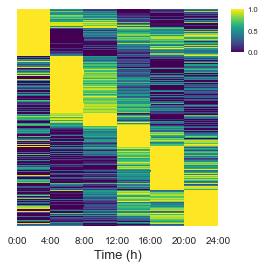

In [27]:
sns.set(font_scale=0.7)
fig, ax = plt.subplots(1, 1, figsize = (3.6,4))
cbar_ax = fig.add_axes([.950, 0.73, .05, .15])
g = sns.heatmap(tot, ax = ax, cbar_ax = cbar_ax, cmap = 'viridis',cbar=True, yticklabels = False)
g.tick_params(labelsize=10)
ax.set_xticklabels(['0:00','4:00','8:00', '12:00','16:00','20:00','24:00'])
ax.tick_params(left=False, bottom=False)
#plt.xticks(np.arange(7)+0.5,('Mon','Tue','Wed','Thu','Fri','Sat','Sun'),
#           rotation=0, fontsize="10", va="center")
xticks = np.linspace(0,6,7)
#fig.tick_params(labelsize=20)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 0.5,1])
cbar.ax.tick_params(size=0)
ax.set_xlabel('Time (h)', fontsize = '13')
#ax.set_ylabel('Rhythmic ASVs')
ax.set_xticks(xticks)
#plt.tight_layout()
#plt.savefig('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/results_20220418/Figures/Final Figures/figure1/heatmap.svg', format = 'svg')

## Regression Plots

In [29]:
joint_phylum2 = phylum.join(metadata.col_bin).dropna()

In [30]:
phylum = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/new_filtering2/bloom/phylum.csv', index_col = 'Unnamed: 0', low_memory = False)
family = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/new_filtering2/bloom/family.csv', index_col = 'Unnamed: 0', low_memory = False)
meta = pd.read_csv('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/new_filtering2/bloom/metadata_all_col.csv', index_col = 'sample_id', low_memory = False)
meta.time = meta.time.astype(str)
meta['col_bin'] = meta['time'].replace(['0.0','1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0','11.0','12.0','13.0','14.0','15.0','16.0','17.0','18.0','19.0','20.0','21.0','22.0','23.0'],['1','1','3','3','5','5','7','7','9','9','11','11','13','13','15','15','17','17','19','19','21','21','23','23'])

In [32]:
jp1 = phylum.join(metadata.col_bin).dropna()
jp2 = phylum.join(meta.col_bin).dropna()

jf1 = family.join(metadata.col_bin).dropna()
jf2 = family.join(meta.col_bin).dropna()

In [40]:
def skeletonbloom(joint_file1, joint_file2, taxa):
    sns.set_style("whitegrid", {'axes.grid' : False})
    #initializing input for cosinor1 function
    joint_file1.col_bin = joint_file1.col_bin.astype(float)
    joint_file1[taxa] = joint_file1[taxa].dropna().astype(float)
    melted1 = pd.melt(joint_file1, id_vars = 'col_bin')
    melted1.rename(columns={'col_bin': 'x','value': 'y','variable': 'test'}, inplace = True)
    melted1.x = melted1.x.astype(float)
    melted1.y = melted1.y.astype(float)
    taxa_of_interest = melted1[melted1.test == taxa]
    
    #initializing bloom included input for cosinor1 function
    joint_file2.col_bin = joint_file2.col_bin.astype(float)
    joint_file2 = joint_file2.astype(float)
    joint_file2[taxa] = joint_file2[taxa].dropna().astype(float)
    melted2 = pd.melt(joint_file2, id_vars = 'col_bin')
    melted2.rename(columns={'col_bin': 'x','value': 'y','variable': 'test'}, inplace = True)

    #performing regression
    info2 = cosinor1.fit_cosinor(X=taxa_of_interest.x, Y=taxa_of_interest.y, period=24, test='test', save_to = 'test', plot_on = True)
    cosinor_results2 = cosinor1.fit_group(taxa_of_interest, period=[24], plot_on = False)

    info1 = cosinor1.fit_cosinor(X=taxa_of_interest.x, Y=taxa_of_interest.y, period=24, test='test', save_to = 'test', plot_on = True)
    cosinor_results1 = cosinor1.fit_group(taxa_of_interest, period=[24], plot_on = False)
        
    #Plotting
    x = np.arange(1,24,1)
    z = cosinor_results1.amplitude[0]*np.cos(np.pi/12*x+cosinor_results1.acrophase[0])+info1[3]['values'][0]
    z2 = cosinor_results2.amplitude[0]*np.cos(np.pi/12*x+cosinor_results2.acrophase[0])+info2[3]['values'][0]
    fig, ax = plt.subplots(figsize=(5,3))
    sns.lineplot(data=joint_file1, x="col_bin", y=taxa, alpha = 1, err_style = 'bars', linestyle = '')
    scatdat1 = joint_file1[['col_bin', taxa]].groupby('col_bin').agg('mean').reset_index()
    e = plt.scatter(scatdat1.col_bin, scatdat1[taxa], label='Data')
    ax.set_xlabel('Time (h)')
    
    sns.lineplot(data=joint_file2, x="col_bin", y=taxa, alpha = 1, err_style = 'bars', linestyle = '')
    scatdat2 = joint_file2[['col_bin', taxa]].groupby('col_bin').agg('mean').reset_index()
    f = plt.scatter(scatdat2.col_bin, scatdat2[taxa], label='Data')

    #making label flexible to family and phylum level inputs
    ax.set_ylabel('CLR')
    if len(joint_file2.columns)>20:
        tax_short = taxa[taxa.find('f__')+3:]
        desig = 'Family/'
    else:
        tax_short = taxa.replace('d__Bacteria;p__','')
        desig = 'Phylum/'
    scientific_notation="{:e}".format(cosinor_results1.q[0])
    pval = 'p* = '+str(scientific_notation)[:4]+str(scientific_notation)[-4:]
    ax.set_title(tax_short, fontsize = 13)
    
    if cosinor_results1.q[0]<0.05:
        a, = plt.plot(x,z, color = sns.color_palette()[0], label = pval)
    if cosinor_results2.q[0]<0.05:
        b, = plt.plot(x,z2, color = sns.color_palette()[1], label = pval)
    legend2 = plt.legend([e,f],['Without Blooms', 'With Blooms'], loc = (1.05, 0.5))
    handles = [mpl_patches.Rectangle((0, 0), 3, 3, fc="white", ec="white", 
                                 lw=0, alpha=0)] * 2
    labels = []
    labels.append(pval)
    legend1 = ax.legend(handles, labels, loc=(1.05,0.863), fontsize='medium', 
          fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)
    ax.add_artist(legend2)
    ax.add_artist(legend1)
    plt.tight_layout()
    
    #plt.savefig('/home/shs008/zarrinpar/Pynchon/Notebooks/arrhythmia/agp/new_filtering2/figures/line_graphs/'+desig+'bloom/'+tax_short+'.svg', bbox_inches = "tight", format = 'svg')
    return fig, ax, pval

In [ ]:
for i in range(len(family.columns)):
    skeletonbloom(jf1,jf2, family.columns[i])

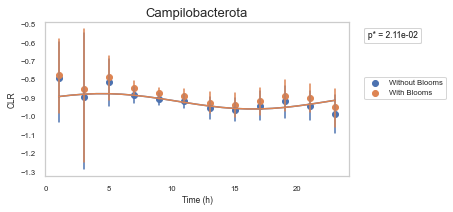

In [42]:
for i in range(len(phylum.columns)):
    skeletonbloom(jp1,jp2, phylum.columns[i])